<a href="https://colab.research.google.com/github/Sai-Nalla/NNDL/blob/main/ICP11_NNDL/icp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 148s 305ms/step - loss: 0.1666 - val_loss: 0.1183
Epoch 2/10
469/469 [==============================] - 124s 264ms/step - loss: 0.1143 - val_loss: 0.1091
Epoch 3/10
469/469 [==============================] - 124s 264ms/step - loss: 0.1086 - val_loss: 0.1069
Epoch 4/10
469/469 [==============================] - 121s 259ms/step - loss: 0.1057 - val_loss: 0.1037
Epoch 5/10
469/469 [==============================] - 127s 271ms/step - loss: 0.1037 - val_loss: 0.1017
Epoch 6/10
469/469 [==============================] - 123s 261ms/step - loss: 0.1021 - val_loss: 0.1006
Epoch 7/10
469/469 [==============================] - 123s 263ms/step - loss: 0.1011 - val_loss: 0.1002
Epoch 8/10
469/469 [==============================] - 122s 261ms/step - loss: 0.1001 - val_loss: 0.0990
Epoch 9/10
469/469 [==============================] - 123s 262ms/step - loss: 0.0995 - val_loss: 0.0988

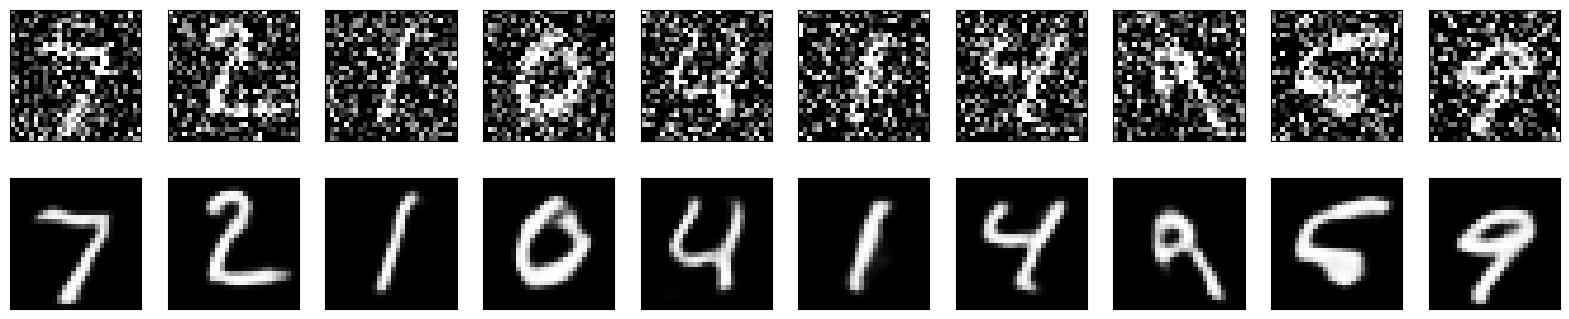

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Dataset Preparation
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Model Architecture
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Model Training
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Model Evaluation
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualization
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Autoencoder architecture
input_img = Input(shape=(28, 28))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.2517 - val_loss: 0.1652
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1612 - val_loss: 0.1577
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1581 - val_loss: 0.1563
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1572 - val_loss: 0.1557
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1567 - val_loss: 0.1554
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1563 - val_loss: 0.1549
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1561 - val_loss: 0.1547
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1559 - val_loss: 0.1547
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1557 - val_loss: 0.1544
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1555 - val_

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Autoencoder architecture with convolutional layers
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

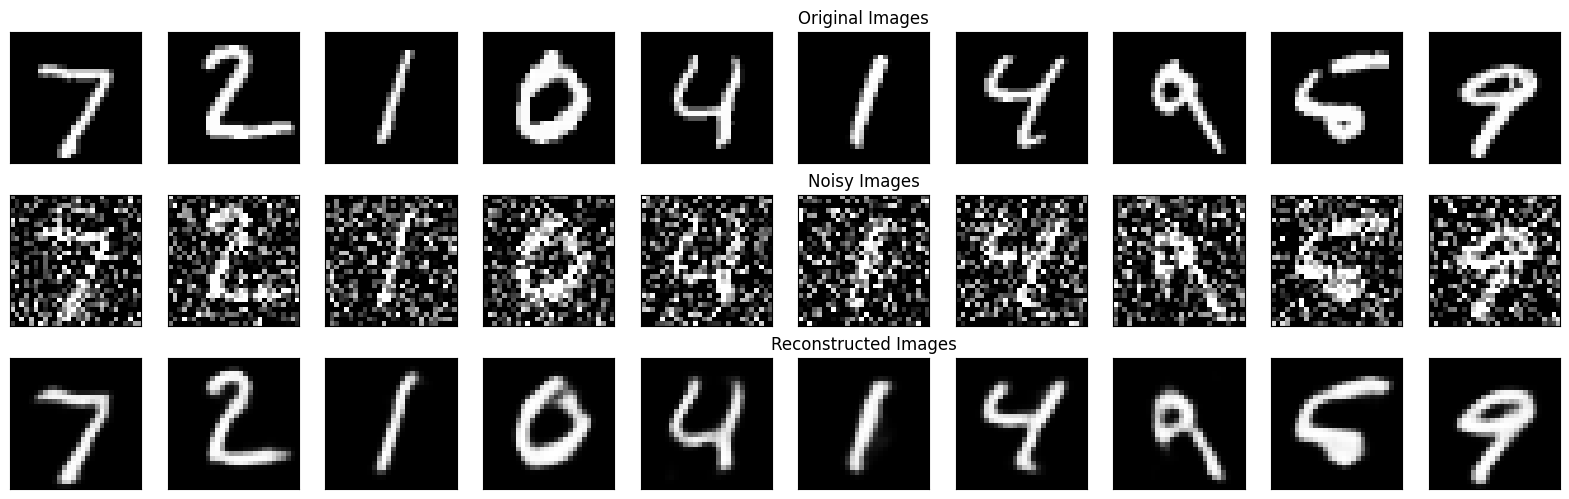

In [5]:
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Images')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Reconstructed Images')
plt.show()